In this blog, I will demonstrate the Naive Bayes implementation (in four steps) in python sklearn library.<br>

***What’s Naive Bayes Algorithm?***<br>
Naive Bayes Algorithm's core is the Bayes Theorem, which is predicting the probability of event happen (e.g. a fire) given some symptoms/features observed (e.g. smoke).<br>

For example, you want to know what are the chances of fire occurrence when you observe smoke? i.e P(fire|smoke) ?<br>

Assume you already know:<br>

1. the P(fire) - the probability of having a fire - is 1%<br>
2. the P(smoke) - the probability of seeing a smoke - is 20%<br>
3. the P(smoke|fire) - out of 100 fire accident, 80 of them starts with smoke - is 80%c

Based on the Bayes Theorem, we can calculate <br>

__P(fire|smoke) = P(fire)*P(smoke|fire)/P(smoke) = 1%x80%/20% = 4%__

***Naive Bayes Implementation using Sklearn***<br>

This example uses the Iris Flower Dataset. For simplicity, I chose only two types of flowers to demonstrate a binary classification using Naive Bayes. Furthermore, only two features are used.<br>

__Step 1: Load the Data__<br>

In [1]:
# Load Library
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
y = iris.target[iris.target<2] # just take two out of four flowers -  Setosa and Versicolour
X = iris.data[:, :2][0:len(y)] # we only take the first two features. and Setosa and Versicolour

__Step 2: Split the Data for Train and Test__

In [3]:
# preprocess dataset
X = StandardScaler().fit_transform(X)
print("mean of feature after normalization: %.2f'" % X.mean())
print("standard deviation of feature after normalization: %.2f'" % X.std())

# split into training and test part
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

mean of feature after normalization: -0.00'
standard deviation of feature after normalization: 1.00'


__Step 3: Train the model__

In [4]:
# Train the model
model = GaussianNB()    
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

__Step 4: Print the Output__

In [5]:
# Output
print("accuracy rate: %.2f'" % accuracy_score(y_test,y_test_pred))
print("confusion matrix:\n",  confusion_matrix(y_test,y_test_pred))

accuracy rate: 1.00'
confusion matrix:
 [[23  0]
 [ 0 17]]


Model output results include:

- accuracy rate: number of points that model classified correctly / total population
Luckily, the Naive Bayes model gets all the points correctly, reaching a 100% accuracy rate.

- confusion matrix: a 2 by 2 grid that shows a classification model performance

![title](Capture1.PNG)

__Step 5: Plot it__

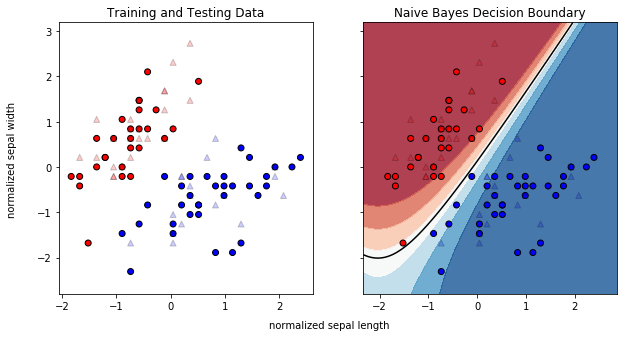

In [6]:
h = 0.05  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5),sharey=True)

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
# Plot the training points
ax1.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
# Plot the testing points
ax1.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.2,
               edgecolors='k',marker='^')
ax1.set_title('Training and Testing Data')

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    
# Put the result into a color plot
Z = Z.reshape(xx.shape)

ax2.contour(xx, yy, Z, [0.5], colors='k')
ax2.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot the training points
ax2.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
# Plot the testing points
ax2.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.2,marker='^')
ax2.set_title('Naive Bayes Decision Boundary')

# Set common labels
f.text(0.5, 0.04, 'normalized sepal length', ha='center', va='center')
f.text(0.06, 0.5, 'normalized sepal width', ha='center', va='center', rotation='vertical')

plt.show()

Training data is plotted as a dot; Testing data is plotted as a triangle. Color represents the true label: red represents flower — Setosa, blue represent flower — Versicolour.<br>

The curve line in the right plot is decision boundary drawn by Naive Bayes Model to classify/separate two types of flowers.<br>

